<a href="https://colab.research.google.com/github/bhuvaneshkj/MachineLearning/blob/master/BandPass%26ButterworthFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob

import numpy as np
import scipy as sp
import scipy.io

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
import random
import math

In [ ]:
#install heartpy
!pip install heartpy

     |████████████████████████████████| 1.0 MB 5.1 MB/s 


In [ ]:
def GetDataSet(name):
  /content/sample_data/Alex Cross PPG Data.csv
  df_ppg = pd.read_csv(name + ' PPG Data.csv', names=['Time', 'Voltage'], header=None)
  df_icm = pd.read_csv(name + ' ICM Data.csv', names=['time','Acc_x','Acc_y','Acc_z','Gyro_x','Gyro_y','Gyro_z'], header=None)  
  return df_ppg,df_icm

In [ ]:

def BandpassFilter(signal, fs):
    '''Bandpass filter the signal between 40 and 240 BPM'''
    
    # Convert to Hz
    lo, hi = 40/60, 240/60
    
    b, a = sp.signal.butter(3, (lo, hi), btype='bandpass', fs=fs)
    return sp.signal.filtfilt(b, a, signal)

In [75]:
#df_ppg, df_icm = GetDataSet('Alex Cross')
df_ppg, df_icm = GetDataSet('Alex Hook')
#df_ppg, df_icm = GetDataSet('Alex Jab')
#df_ppg, df_icm = GetDataSet('Alex Uppercut')
#df_ppg, df_icm = GetDataSet('Ronny Cross')
#df_ppg, df_icm = GetDataSet('Ronny Hook')
#df_ppg, df_icm = GetDataSet('Ronny Jab')
#df_ppg, df_icm = GetDataSet('Ronny Kick 1')
#df_ppg, df_icm = GetDataSet('Ronny Kick 2')

In [23]:
df_ppg

,Time,Voltage
0,0.00,1.504248
1,0.01,1.507104
2,0.02,1.518970
3,0.03,1.526221
4,0.04,1.527759
...,...,...
5635,56.35,1.525781
5636,56.36,1.489526
5637,56.37,1.457886
5638,56.38,1.429980


<Figure size 864x288 with 0 Axes>

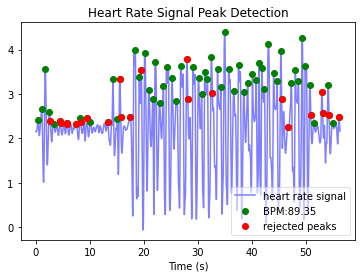

In [17]:

working_data1, measures = hp.process(df_ppg["Voltage"], 100.0)
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)

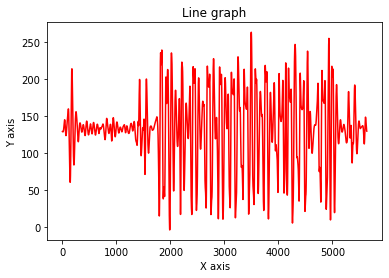

In [18]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to be plotted
x = np.arange(0, len(working_data1['hr']))
y = working_data['hr']*60
 
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()

<Figure size 864x288 with 0 Axes>

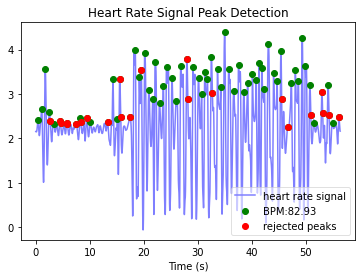

In [19]:
import heartpy as hp

ppg_bandpass = BandpassFilter(df_ppg["Voltage"], fs=100)
working_data, measures = hp.process(ppg_bandpass, 100.0)
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)

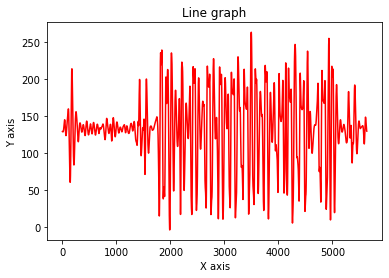

In [20]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to be plotted
x = np.arange(0, len(working_data['hr']))
y = working_data['hr']*60
 
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()

In [14]:
#working_data

In [21]:
working_data['hr']

array([2.15550598, 2.15438532, 2.15324553, ..., 2.17071965, 2.16680696,
       2.16474341])

In [22]:
working_data1['hr']

0       1.517871
1       1.520728
2       1.532593
3       1.539844
4       1.541382
          ...   
5635    1.539404
5636    1.503149
5637    1.471509
5638    1.443604
5639    1.413062
Name: Voltage, Length: 5640, dtype: float64

In [13]:
working_data['rolling_mean']

array([2.33202786, 2.33202786, 2.33202786, ..., 2.3136884 , 2.3136884 ,
       2.3136884 ])

In [ ]:
#Butterworth

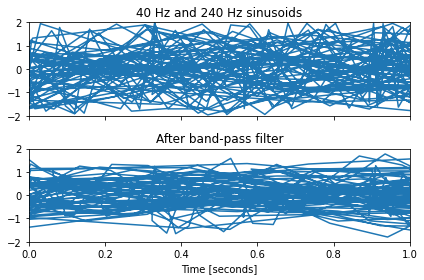

In [32]:
sos = signal.butter(2,[40, 240], 'bandpass', fs=1000, output='sos')
sig = np.sin(2*np.pi*40*df_ppg['Voltage']) + np.sin(2*np.pi*240*df_ppg['Voltage'])
filtered = signal.sosfilt(sos, sig)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(df_ppg['Voltage'], sig)
ax1.set_title('40 Hz and 240 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
ax2.plot(df_ppg['Voltage'], filtered)
ax2.set_title('After band-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

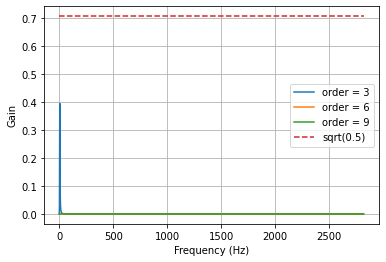

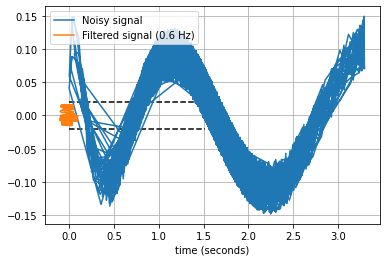

In [79]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5640
    lowcut = 0.6
    highcut = 4

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = df_ppg['Voltage']
    t=T
    #nsamples = T * fs
    #t = np.linspace(0, T, nsamples, endpoint=False)
    t=T
    a = 0.02
    f0 = 0.6
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=2)
    plt.plot(x, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [72]:
x

0       0.017642
1       0.016778
2       0.013183
3       0.010984
4       0.010517
          ...   
5635    0.011117
5636    0.022088
5637    0.031549
5638    0.039725
5639    0.048410
Name: Voltage, Length: 5640, dtype: float64

In [69]:
y

array([ 5.38092180e-06,  2.68859712e-05,  6.98723732e-05, ...,
       -1.65978553e-01, -1.65725957e-01, -1.65477039e-01])

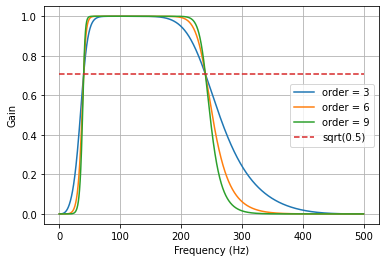

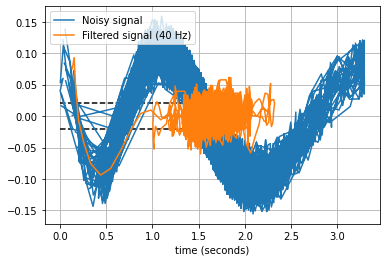

In [80]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    #b, a = butter(order, [low, high], btype='band')
    #return b, a
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    #b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    #y = lfilter(b, a, data)
    #return y
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    from scipy.signal import butter, sosfilt, sosfreqz


    
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 1000.0
    lowcut = 40.0
    highcut = 240.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        #b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        #w, h = freqz(b, a, worN=2000)
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = sosfreqz(sos, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = df_ppg['Voltage']
    nsamples = T * fs
    #t = np.linspace(0, T, nsamples, endpoint=False)
    t=T
    a = 0.02
    f0 = 40.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=2)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [81]:
y

array([-0.00584747, -0.01855168, -0.01034863, ...,         nan,
               nan,         nan])

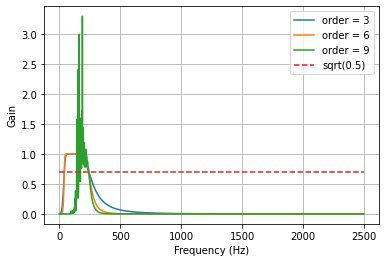

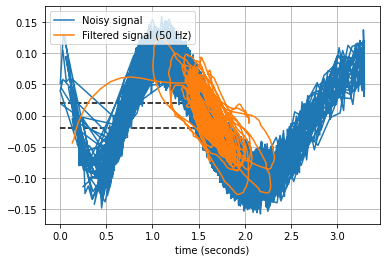

In [82]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 40
    highcut = 240

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    #T = 0.05
    #nsamples = int(T * fs)
    #t = np.linspace(0, T, nsamples, endpoint=False)
    t=df_ppg['Voltage']
    a = 0.02
    f0 = 50
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=2)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()


run()

In [83]:
y

array([-0.00584747, -0.01855168, -0.01034863, ...,         nan,
               nan,         nan])

In [84]:
working_data, measures = hp.process(y, 100.0)
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)

BadSignalWarning: ignored

In [41]:
t-y

0       1.504620
1       1.508986
2       1.521467
3       1.523006
4       1.516167
          ...   
5635         NaN
5636         NaN
5637         NaN
5638         NaN
5639         NaN
Name: Voltage, Length: 5640, dtype: float64

In [ ]:
#Final

In [87]:
'''
Functions for data filtering tasks.
'''

from scipy.signal import butter, filtfilt, iirnotch, savgol_filter
import numpy as np



__all__ = ['filter_signal',
           'hampel_filter',
           'hampel_correcter',
           'smooth_signal']

def butter_lowpass(cutoff, sample_rate, order=2):
    '''standard lowpass filter.

    Function that defines standard Butterworth lowpass filter

    Parameters
    ----------
    cutoff : int or float
        frequency in Hz that acts as cutoff for filter.
        All frequencies above cutoff are filtered out.

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default: 2
    
    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    >>> b, a = butter_lowpass(cutoff = 2, sample_rate = 100, order = 2)
    >>> b, a = butter_lowpass(cutoff = 4.5, sample_rate = 12.5, order = 5)
    '''
    nyq = 0.5 * sample_rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_highpass(cutoff, sample_rate, order=2):
    '''standard highpass filter.

    Function that defines standard Butterworth highpass filter

    Parameters
    ----------
    cutoff : int or float
        frequency in Hz that acts as cutoff for filter.
        All frequencies below cutoff are filtered out.

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default : 2
    
    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    we can specify the cutoff and sample_rate as ints or floats.

    >>> b, a = butter_highpass(cutoff = 2, sample_rate = 100, order = 2)
    >>> b, a = butter_highpass(cutoff = 4.5, sample_rate = 12.5, order = 5)
    '''
    nyq = 0.5 * sample_rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


def butter_bandpass(lowcut, highcut, sample_rate, order=2):
    '''standard bandpass filter.
    Function that defines standard Butterworth bandpass filter.
    Filters out frequencies outside the frequency range
    defined by [lowcut, highcut].

    Parameters
    ----------
    lowcut : int or float
        Lower frequency bound of the filter in Hz

    highcut : int or float
        Upper frequency bound of the filter in Hz

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default : 2
    
    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    we can specify lowcut, highcut and sample_rate as ints or floats.

    >>> b, a = butter_bandpass(lowcut = 1, highcut = 6, sample_rate = 100, order = 2)
    >>> b, a = butter_bandpass(lowcut = 0.4, highcut = 3.7, sample_rate = 72.6, order = 2)
    '''
    nyq = 0.5 * sample_rate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def filter_signal(data, cutoff, sample_rate, order=2, filtertype='lowpass',
                  return_top = False):
    '''Apply the specified filter

    Function that applies the specified lowpass, highpass or bandpass filter to
    the provided dataset.

    Parameters
    ----------
    data : 1-dimensional numpy array or list 
        Sequence containing the to be filtered data

    cutoff : int, float or tuple
        the cutoff frequency of the filter. Expects float for low and high types
        and for bandpass filter expects list or array of format [lower_bound, higher_bound]

    sample_rate : int or float
        the sample rate with which the passed data sequence was sampled

    order : int
        the filter order 
        default : 2

    filtertype : str
        The type of filter to use. Available:
        - lowpass : a lowpass butterworth filter
        - highpass : a highpass butterworth filter
        - bandpass : a bandpass butterworth filter
        - notch : a notch filter around specified frequency range
        both the highpass and notch filter are useful for removing baseline wander. The notch
        filter is especially useful for removing baseling wander in ECG signals.


    Returns
    -------
    out : 1d array
        1d array containing the filtered data

    Examples
    --------
    >>> import numpy as np
    >>> import heartpy as hp

    Using standard data provided

    >>> data, _ = hp.load_exampledata(0)

    We can filter the signal, for example with a lowpass cutting out all frequencies
    of 5Hz and greater (with a sloping frequency cutoff)

    >>> filtered = filter_signal(data, cutoff = 5, sample_rate = 100.0, order = 3, filtertype='lowpass')
    >>> print(np.around(filtered[0:6], 3))
    [530.175 517.893 505.768 494.002 482.789 472.315]

    Or we can cut out all frequencies below 0.75Hz with a highpass filter:

    >>> filtered = filter_signal(data, cutoff = 0.75, sample_rate = 100.0, order = 3, filtertype='highpass')
    >>> print(np.around(filtered[0:6], 3))
    [-17.975 -28.271 -38.609 -48.992 -58.422 -67.902]

    Or specify a range (here: 0.75 - 3.5Hz), outside of which all frequencies
    are cut out.

    >>> filtered = filter_signal(data, cutoff = [0.75, 3.5], sample_rate = 100.0, 
    ... order = 3, filtertype='bandpass')
    >>> print(np.around(filtered[0:6], 3))
    [-12.012 -23.159 -34.261 -45.12  -55.541 -65.336]

    A 'Notch' filtertype is also available (see remove_baseline_wander).
    
    >>> filtered = filter_signal(data, cutoff = 0.05, sample_rate = 100.0, filtertype='notch')

    Finally we can use the return_top flag to only return the filter response that
    has amplitute above zero. We're only interested in the peaks, and sometimes
    this can improve peak prediction:

    >>> filtered = filter_signal(data, cutoff = [0.75, 3.5], sample_rate = 100.0, 
    ... order = 3, filtertype='bandpass', return_top = True)
    >>> print(np.around(filtered[48:53], 3))
    [ 0.     0.     0.409 17.088 35.673]
    '''
    if filtertype.lower() == 'lowpass':
        b, a = butter_lowpass(cutoff, sample_rate, order=order)
    elif filtertype.lower() == 'highpass':
        b, a = butter_highpass(cutoff, sample_rate, order=order)
    elif filtertype.lower() == 'bandpass':
        assert type(cutoff) == tuple or list or np.array, 'if bandpass filter is specified, \
cutoff needs to be array or tuple specifying lower and upper bound: [lower, upper].'
        b, a = butter_bandpass(cutoff[0], cutoff[1], sample_rate, order=order)
    elif filtertype.lower() == 'notch':
        b, a = iirnotch(cutoff, Q = 0.005, fs = sample_rate)
    else:
        raise ValueError('filtertype: %s is unknown, available are: \
lowpass, highpass, bandpass, and notch' %filtertype)

    filtered_data = filtfilt(b, a, data)
    
    if return_top:
        return np.clip(filtered_data, a_min = 0, a_max = None)
    else:
        return filtered_data

In [91]:
output = filter_signal(df_ppg['Voltage'], [0.2,4], 100, order=2, filtertype='bandpass',
                  return_top = False)

In [92]:
output

array([ 0.06489227,  0.08652146,  0.10818264, ..., -0.05005665,
       -0.04430381, -0.03836413])

<Figure size 864x288 with 0 Axes>

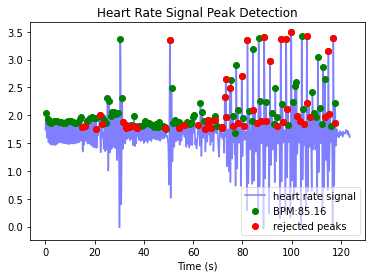

In [94]:
working_data1, measures = hp.process(output, 100.0)
plt.figure(figsize=(12,4))
hp.plotter(working_data1, measures)